In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [2]:
# Font veranderen. 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
base_path = '../processed_data/performance_testing/'
scenarios = ['login', 'register', 'transactions', 'transactions-edit-2', 'places']

scenario_descriptions = {
    'login': 'Inlogpagina',
    'register': 'Registreerpagina',
    'transactions': 'Transacties',
    'transactions-edit-2': 'Transactie bewerken',
    'places': 'Plaatsen'
}

statistic_descriptions = {
    'score': 'Score',
    'first-contentful-paint': 'First Contentful Paint',
    'largest-contentful-paint': 'Largest Contentful Paint',
    'total-blocking-time': 'Total Blocking Time',
    'cumulative-layout-shift': 'Cumulative Layout Shift',
    'speed-index': 'Speed Index',
}

Calculate mean and standard deviation.

In [4]:
for scenario in scenarios: 
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{scenario}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{scenario}.csv', delimiter=',', header=0, index_col=0)

    print(scenario)

    for statistic in before.columns: 
        before_mean = before[statistic].mean()
        before_std = before[statistic].std()

        after_mean = after[statistic].mean()
        after_std = after[statistic].std()

        print(f'    {statistic}:')
        print(f'    before: mean={before_mean:.2f} std={before_std:.2f}')
        print(f'    after: mean={after_mean:.2f} std={after_std:.2f}')
        print()


login
    score:
    before: mean=0.55 std=0.00
    after: mean=0.55 std=0.00

    first-contentful-paint:
    before: mean=9998.75 std=73.35
    after: mean=16884.68 std=91.91

    largest-contentful-paint:
    before: mean=17098.51 std=73.62
    after: mean=28292.89 std=87.67

    total-blocking-time:
    before: mean=39.98 std=6.16
    after: mean=48.90 std=13.37

    cumulative-layout-shift:
    before: mean=0.00 std=0.00
    after: mean=0.00 std=0.00

    speed-index:
    before: mean=12245.10 std=398.53
    after: mean=20809.80 std=197.04

register
    score:
    before: mean=0.55 std=0.00
    after: mean=0.55 std=0.00

    first-contentful-paint:
    before: mean=9969.91 std=40.18
    after: mean=20959.17 std=410.08

    largest-contentful-paint:
    before: mean=17065.09 std=50.65
    after: mean=36517.98 std=831.63

    total-blocking-time:
    before: mean=34.75 std=2.85
    after: mean=77.68 std=9.17

    cumulative-layout-shift:
    before: mean=0.00 std=0.00
    after: mea

Visualize results with boxplot.

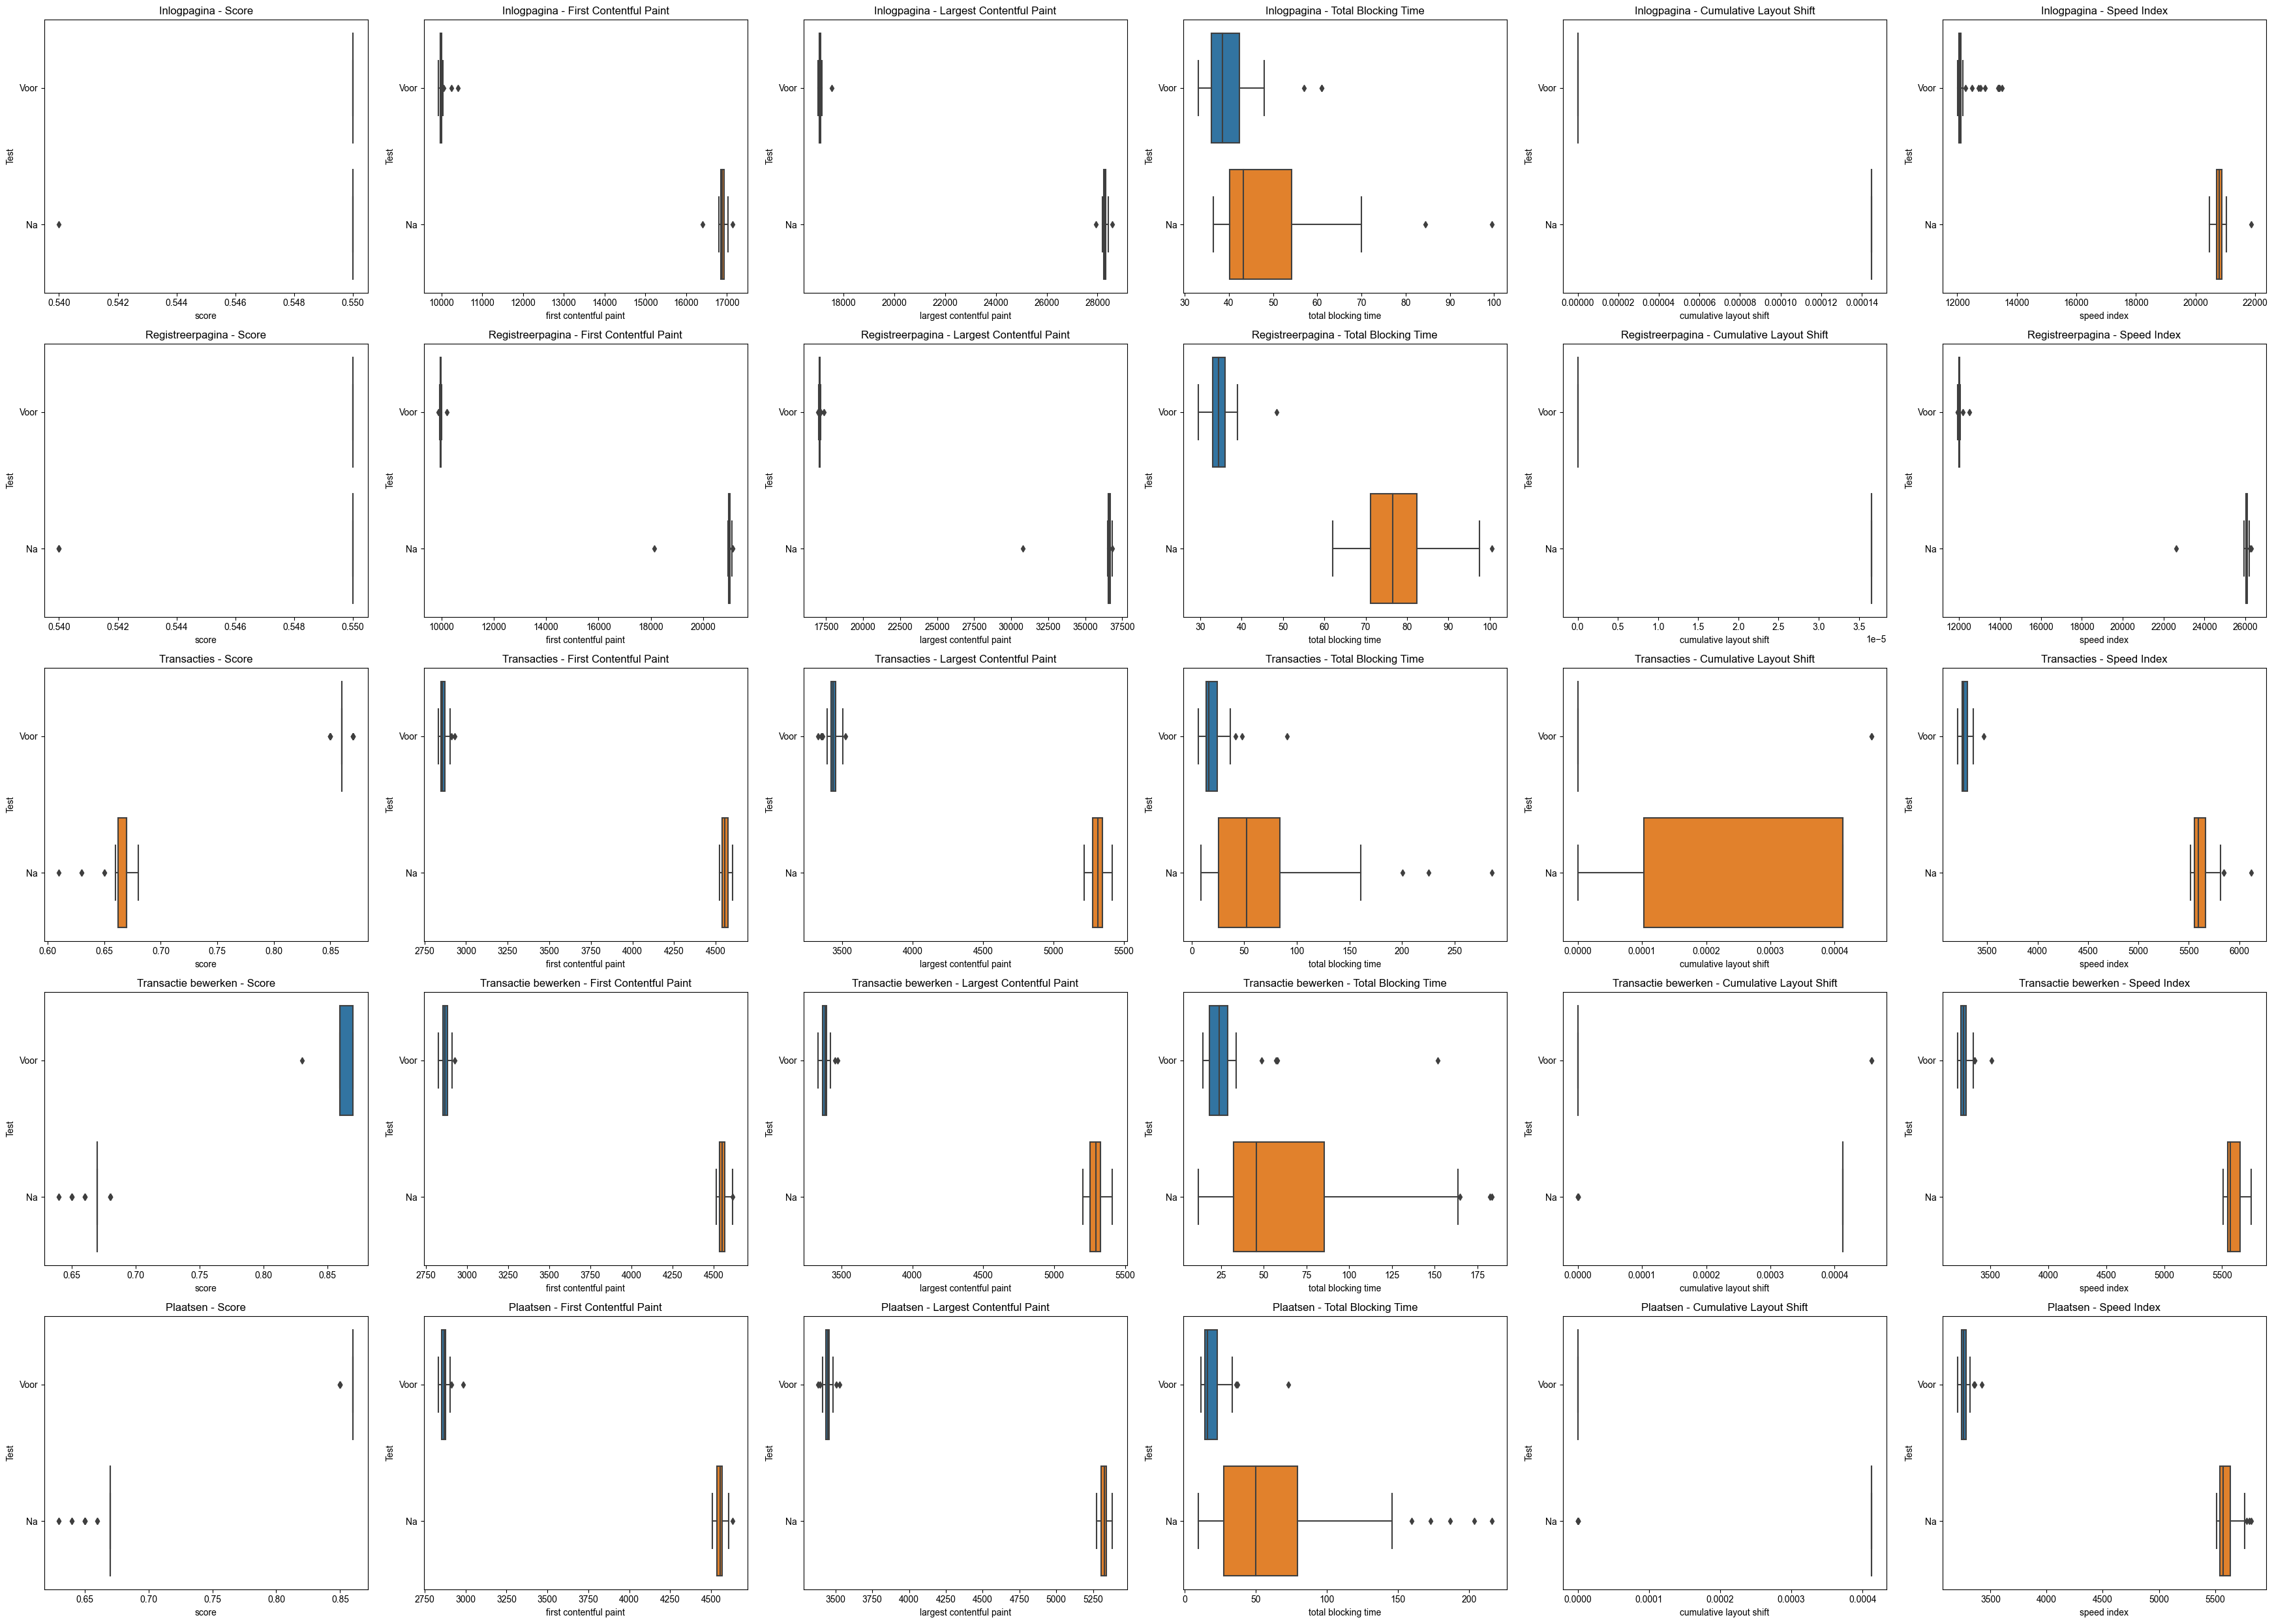

In [5]:
figure, axes = plt.subplots(len(scenarios), 6, figsize=(35, 5*len(scenarios)))

for scenario_axes, scenario in zip(axes, scenarios):
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{scenario}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{scenario}.csv', delimiter=',', header=0, index_col=0)

    before['source'] = 'Voor'
    after['source'] = 'Na'

    data = pd.concat([before, after])

    for ax, statistic in zip(scenario_axes, before.columns): 
        sns.boxplot(data=data, x=statistic, y='source', ax=ax)

        ax.set_title(f'{scenario_descriptions[scenario]} - {statistic_descriptions[statistic]}')
        ax.set_xlabel(statistic_descriptions[statistic].lower())
        ax.set_ylabel('Test')

plt.tight_layout()
plt.show()

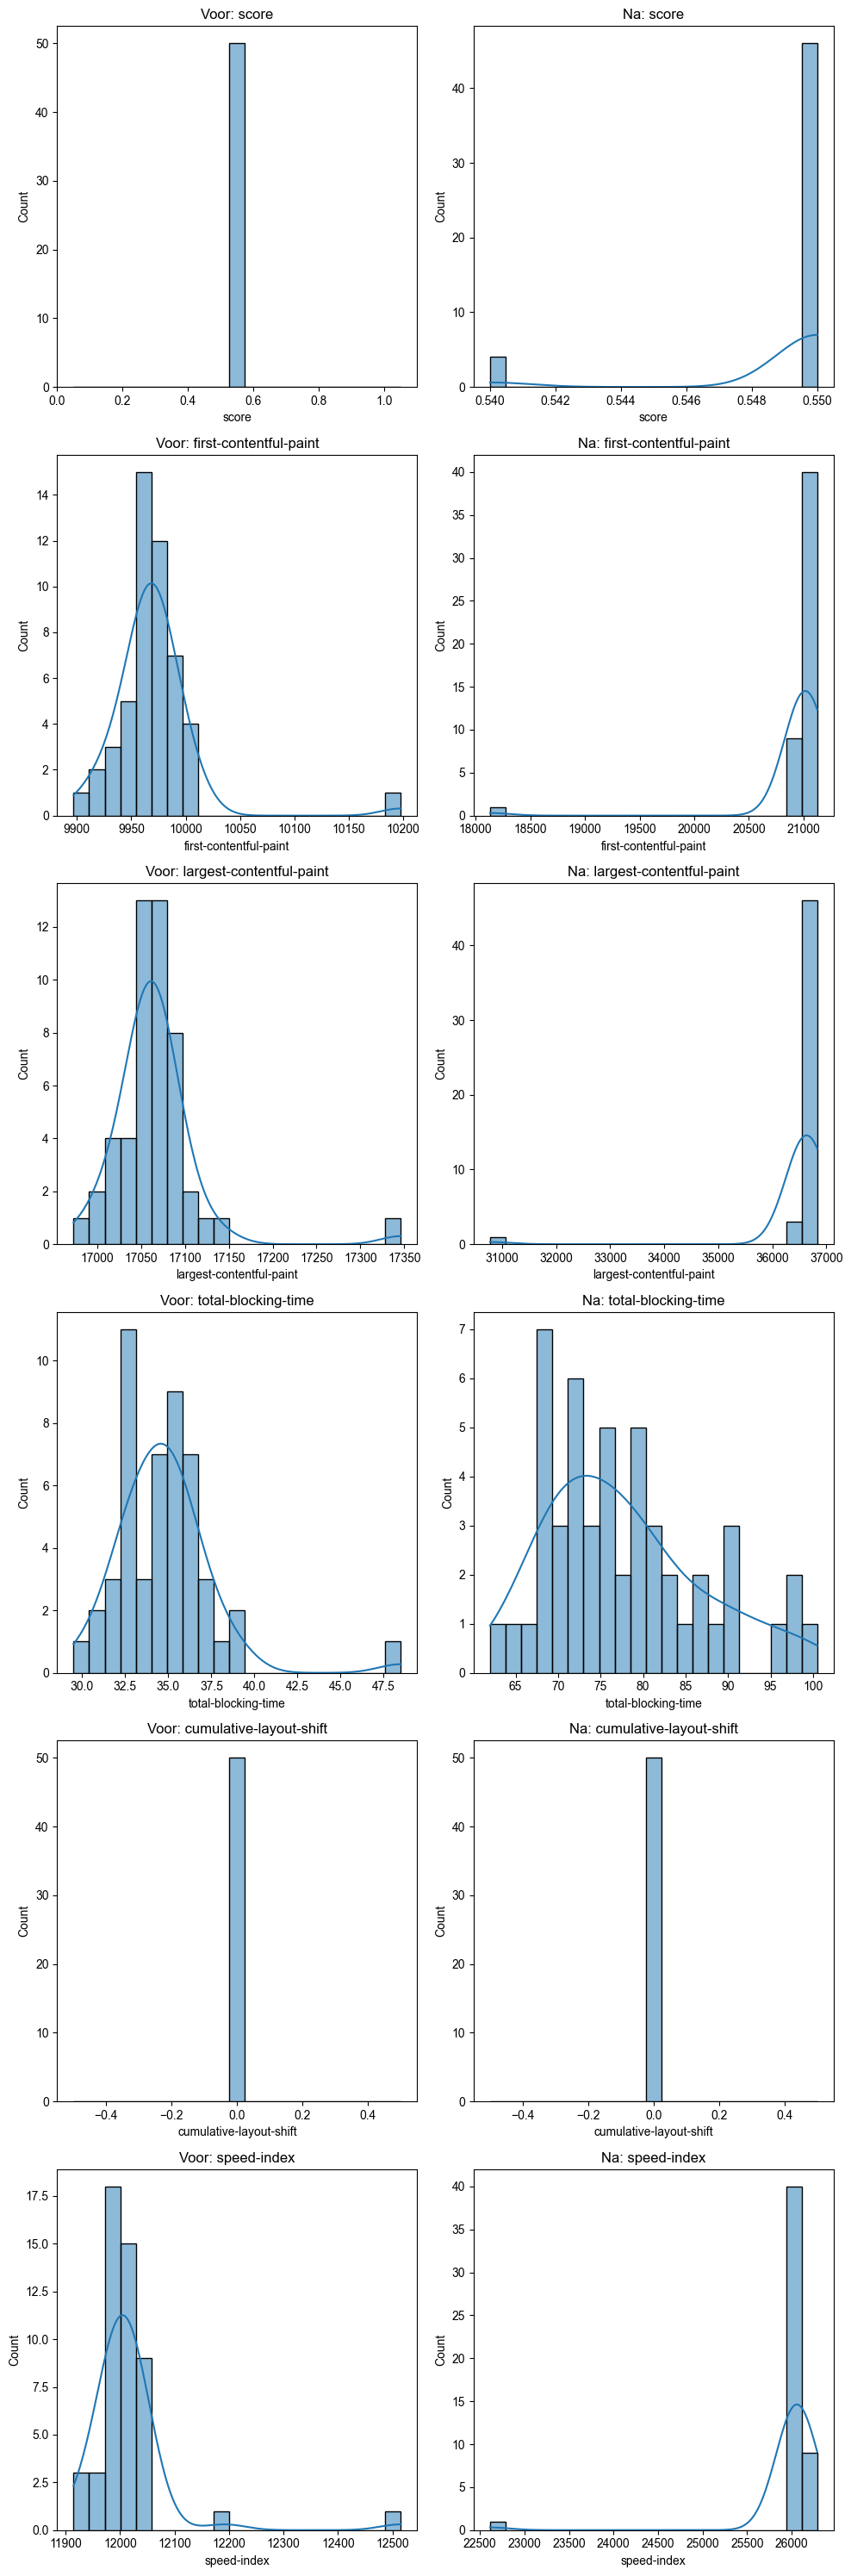

In [6]:
before = pd.read_csv(filepath_or_buffer='../processed_data/performance_testing/original/register.csv', delimiter=',', header=0, index_col=0)
after = pd.read_csv(filepath_or_buffer='../processed_data/performance_testing/cybersecurity/register.csv', delimiter=',', header=0, index_col=0)


figure, axes = plt.subplots(len(before.columns), 2, figsize=(10, 5*len(before.columns)))

for scenario_axes, column in zip(axes, before.columns):
    sns.histplot(data=before, x=column, bins=21, kde=True, ax=scenario_axes[0])
    scenario_axes[0].set_title(f"Voor: {column}")

for scenario_axes, column in zip(axes, after.columns):
    sns.histplot(data=after, x=column, bins=21, kde=True, ax=scenario_axes[1])
    scenario_axes[1].set_title(f"Na: {column}")

plt.tight_layout()

plt.savefig('output.png', dpi=300)

plt.show()


In [2]:
base_path = '../data/processed/performance_testing'
tests = ['login',  'places', 'transactions', 'transactions-edit']

for test in tests:
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{test}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{test}.csv', delimiter=',', header=0, index_col=0)

    original_scores = before.score.unique()
    cybersecurity_scores = after.score.unique()

    print(f'{test}:')
    print(f'original:      {sorted(original_scores, reverse=True)}')
    print(f'cybersecurity: {sorted(cybersecurity_scores, reverse=True)}\n')

login:
original:      [0.55, 0.54]
cybersecurity: [0.55, 0.54, 0.53, 0.52, 0.47]

places:
original:      [0.87, 0.86, 0.85, 0.84]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.61, 0.6, 0.59, 0.57]

transactions:
original:      [0.87, 0.86, 0.85, 0.84]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.62, 0.61, 0.6, 0.59, 0.58, 0.53, 0.51, 0.5]

transactions-edit:
original:      [0.87, 0.86, 0.85, 0.84, 0.82]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55]

